In [4]:
from cartpole import *
import pandas as pd

In [2]:
n_steps = 25_000
rc_ppo_results = test_agent(reality_check(PPO_learner), n_steps,env=CartPole_IgnoreRewards)
ppo_results = test_agent(PPO_learner, n_steps,env=CartPole_IgnoreRewards)
dqn_results = test_agent(DQN_learner, n_steps,env=CartPole_IgnoreRewards)
rc_dqn_results = test_agent(reality_check(DQN_learner), n_steps,env=CartPole_IgnoreRewards)

avg_episode_reward: 19.874452554744526
avg_episode_len: 36.41313868613139
avg_episode_reward: 20.5609756097561
avg_episode_len: 40.56585365853658
avg_episode_reward: 7.2318969346956905
avg_episode_len: 11.106175033318525
avg_episode_reward: 8.65244375484872
avg_episode_len: 9.69511249030256


In [26]:
n_steps = 50_000
ppo_results_lr = test_agent(PPO_learner, n_steps,env=CartPole_IncentivizeLearningRate)
rc_ppo_results_lr = test_agent(reality_check(PPO_learner), n_steps,env=CartPole_IncentivizeLearningRate)
dqn_results_lr = test_agent(DQN_learner, n_steps,env=CartPole_IncentivizeLearningRate)
rc_dqn_results_lr = test_agent(reality_check(DQN_learner), n_steps,env=CartPole_IncentivizeLearningRate)

avg_episode_reward: 24.74931129476584
avg_episode_len: 45.888888888888886
avg_episode_reward: 23.036533559898047
avg_episode_len: 42.416312659303316
avg_episode_reward: 4.093525179856115
avg_episode_len: 9.992006394884093
avg_episode_reward: 9.114540865851291
avg_episode_len: 9.705299941758883


In [7]:
def get_df_results(results,keys={'episode_rewards','episode_lengths'}):
    return pd.DataFrame({
        key:results[key] 
        for key in results.keys() 
        if key in keys
    })

In [ ]:
dqn_df = get_df_results(dqn_results)
rc_dqn_df = get_df_results(rc_dqn_results)
ppo_df = get_df_results(ppo_results)
rc_ppo_df = get_df_results(rc_ppo_results)

In [9]:
dqn_df

,episode_rewards,episode_lengths
0,1.0,29
1,0.0,35
2,14.0,41
3,0.0,36
4,0.0,38
...,...,...
2246,4.0,9
2247,3.0,10
2248,3.0,9
2249,3.0,11


<AxesSubplot:>

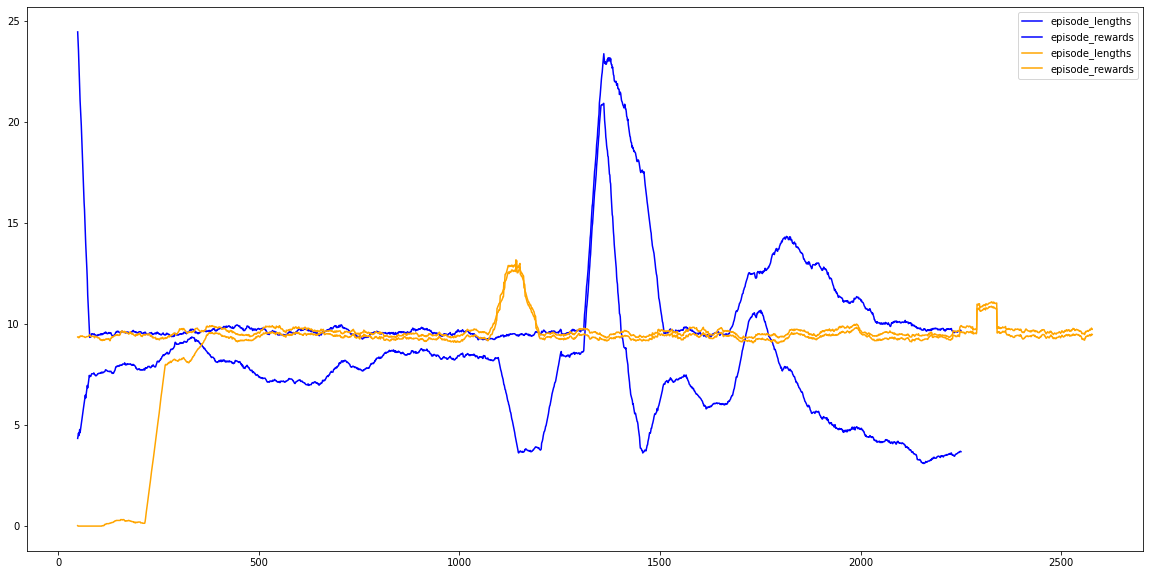

In [28]:
ax = dqn_df[['episode_lengths','episode_rewards']].rolling(window=50).mean().plot(color='b',figsize=(20,10))
rc_dqn_df[['episode_lengths','episode_rewards']].rolling(window=50).mean().plot(ax=ax,color='orange')

<AxesSubplot:>

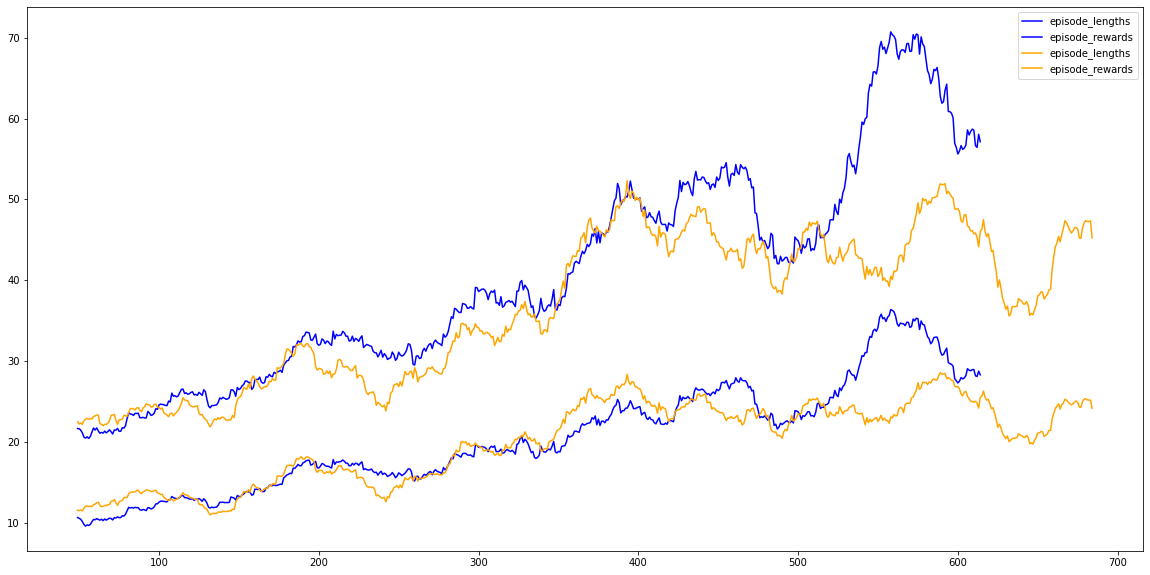

In [29]:
ax = ppo_df[['episode_lengths','episode_rewards']].rolling(window=50).mean().plot(color='b',figsize=(20,10))
rc_ppo_df[['episode_lengths','episode_rewards']].rolling(window=50).mean().plot(ax=ax,color='orange')

In [30]:
dqn_df_lr = get_df_results(dqn_results_lr)
rc_dqn_df_lr = get_df_results(rc_dqn_results_lr)
ppo_df_lr = get_df_results(ppo_results_lr)
rc_ppo_df_lr = get_df_results(rc_ppo_results_lr)

<AxesSubplot:>

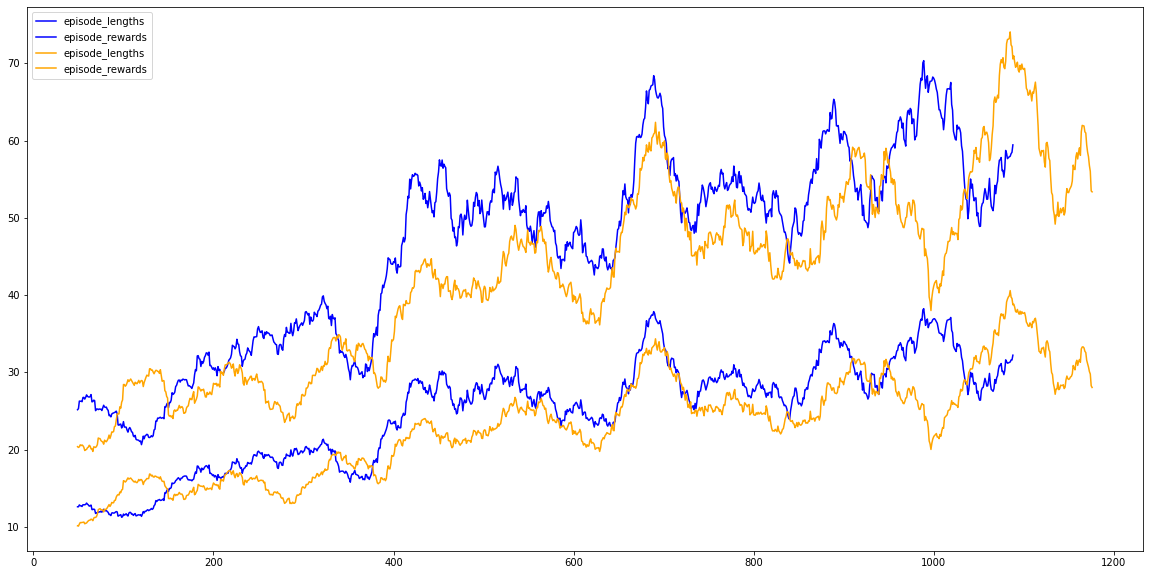

In [31]:
ax = ppo_df_lr[['episode_lengths','episode_rewards']].rolling(window=50).mean().plot(color='b',figsize=(20,10))
rc_ppo_df_lr[['episode_lengths','episode_rewards']].rolling(window=50).mean().plot(ax=ax,color='orange')

<AxesSubplot:>

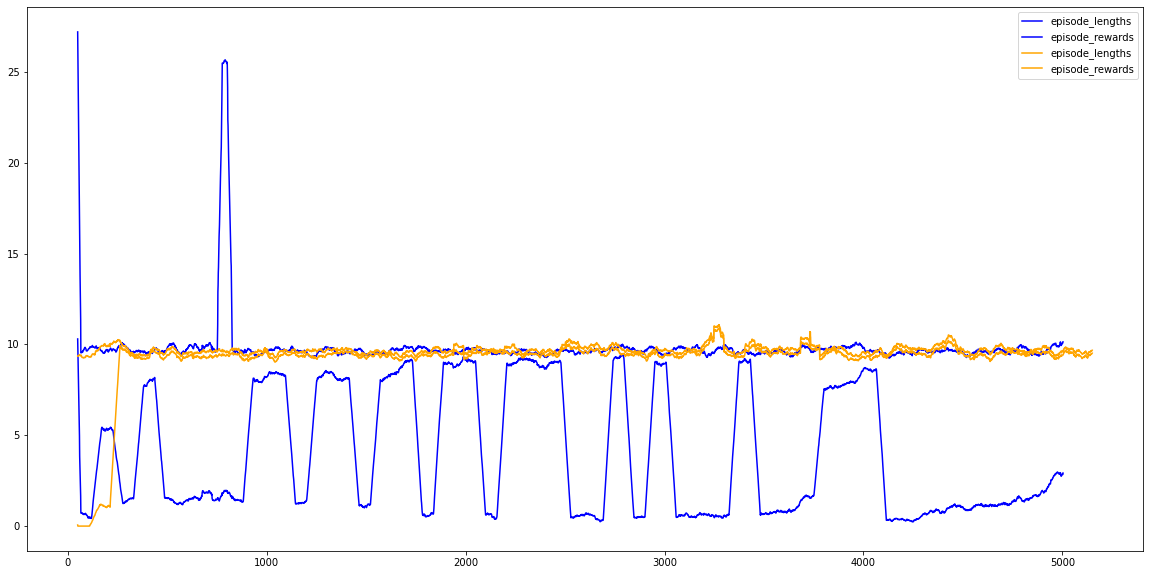

In [32]:
ax = dqn_df_lr[['episode_lengths','episode_rewards']].rolling(window=50).mean().plot(color='b',figsize=(20,10))
rc_dqn_df_lr[['episode_lengths','episode_rewards']].rolling(window=50).mean().plot(ax=ax,color='orange')

In [1]:
import ExtendedEnvironmentsMod as ee

In [2]:
def ee_generator():
    return ee.ExtendedEnvConnector("CartPole-v0",ee.IgnoreRewards)

In [5]:
n_steps=10_000
t_ppo_results = test_agent(PPO_learner, n_steps,env=ee_generator)

avg_episode_reward: 15.596875
avg_episode_len: 31.25


<AxesSubplot:>

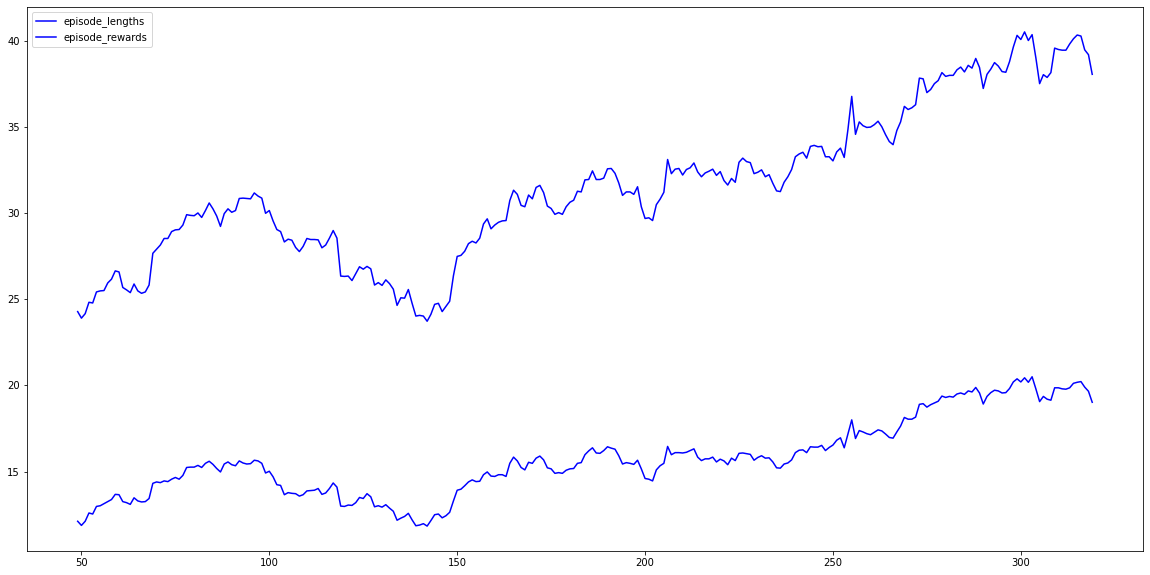

In [8]:
t_ppo_df = get_df_results(t_ppo_results)
t_ppo_df[['episode_lengths','episode_rewards']].rolling(window=50).mean().plot(color='b',figsize=(20,10))